In [25]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Swain vs. Alabama ##

In 1962, a Black man named Robert Swain was convicted of murder in Talladega Country.

At that time, 26% of residents eligible for jury duty were Black.

Of the 100 jurors selected for Swain's trial, only 8 were Black.

Null Hypothesis: The jurly selection was uniform and random. Pure random chance is sufficient to explain the observation (8% Black jurors).

Strategy for exploring the null hypothesis
1. Use sample_proportions to write a function that creates 100-person jury assuming 26% of the population is Black. The function should return the *number* of people on the jury identifying as Black.
2. Use a for loop simulate this statistic for 10,000 juries. Store all the outcomes in an array.
3. Create a single column table containing the outcomes in the array.
4. Visualize the outcomes with a histogram.

In [26]:
# Step 1
def talladega_jurors():
    ethnic_dist=make_array(0.26,0.74)
    simulated_jury_dist=sample_proportions(100,ethnic_dist)
    number_black_jurors=simulated_jury_dist.item(0)*100
    return number_black_jurors

talladega_jurors()

26.0

In [27]:
# Step 2
jury_array=make_array()
for i in np.arange(10000):
    result=talladega_jurors()
    jury_array=np.append(jury_array,result)
jury_array

array([ 23.,  27.,  37., ...,  31.,  25.,  26.])

In [28]:
# Step 3
jury_table = Table().with_column('Num Black Jurors',jury_array)
jury_table


Num Black Jurors
23
27
37
25
29
22
26
21
26
20


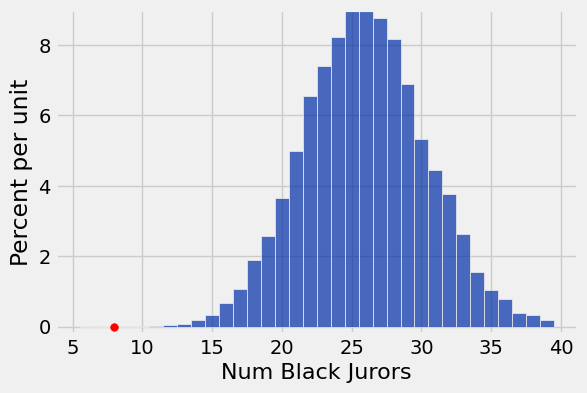

In [29]:
# Step 4 (already done)

jury_table.hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

### Alameda County Jury Panels ###

In [30]:
# Ethnicity: Juror's self-reported ethnicity
# Eligible: Percent of Alemeda County residents (eligible for jury duty) identifying as each ethnicity
# Panels: Percent of jurors identifying as each ethnicity (1453 jurors in total)
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


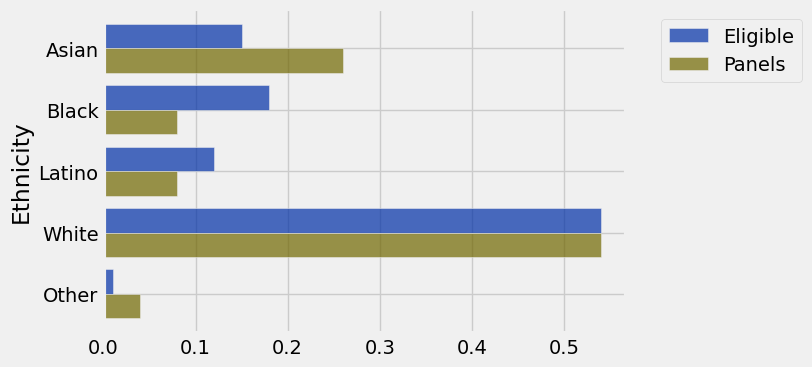

In [31]:
jury.barh('Ethnicity')

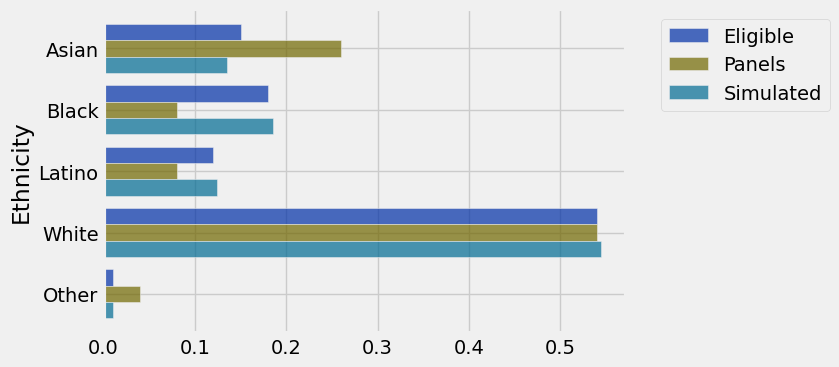

In [32]:
ethnicity_prop = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
simulated_jurors = sample_proportions(1453, ethnicity_prop)
jury_with_simulated = jury.with_column('Simulated', simulated_jurors)
jury_with_simulated.barh('Ethnicity')

#### Distance Between Distributions

In [33]:
# Difference between "eligible" distribution and "panels" distribution
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


#### Total Variation Distance

Total variation distance is defined to be the sum of the *absolute values* of the differences divided by 2.

In [40]:
# Write a function that takes two arrays as inputs (representing two different distributions)
# and returns the total variation distance between them.
# Use np.abs for absolute value.
def tvd(distribution1, distribution2):
    return np.sum(np.abs(distribution1-distribution2))/2

In [41]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [50]:
# The TVD of a model simluation from its expected values
ethnicity_prop = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
simulated_jurors = sample_proportions(1453, ethnicity_prop)
tvd(simulated_jurors, jury.column('Eligible'))

0.020433585684790083

In [54]:
# Step 1: Write a function that returns the TVD between a simulated jury and the "eligibile" distribution
def simulated_tvd():
    ethnicity_prop = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
    simulated_jurors = sample_proportions(1453, ethnicity_prop)
    return tvd(simulated_jurors, jury.column('Eligible'))

In [60]:
# Step 2: Run simulated_tvd() 10,000 times and collect all the outputs in an array
tvds = make_array()
tvd_array=make_array()
for i in np.arange(10000):
    results=simulated_tvd()
    tvds=np.append(tvds,results)
tvds

array([ 0.01090158,  0.01931865,  0.00899518, ...,  0.01275981,
        0.0152512 ,  0.0163042 ])

Observed TVD: 0.14


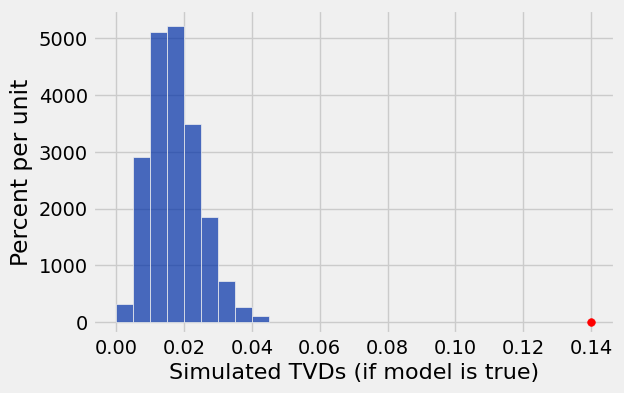

In [61]:
# Step 3 and 4: Create a table and histogram of the different TVDs
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(obsvd_tvd, 0, color='red', s=30);